In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [2]:
def parser(s):
    return datetime.strptime(s,'%Y-%m')

In [3]:
ice_cream_heater_df=pd.read_csv('ice_cream_vs_heater.csv',parse_dates=[0],index_col=0,squeeze=True)

In [4]:
ice_cream_heater_df=ice_cream_heater_df.asfreq(pd.infer_freq(ice_cream_heater_df.index))

In [5]:
heater_series=ice_cream_heater_df.heater

In [6]:
heater_series

Month
2004-01-01    27
2004-02-01    18
2004-03-01    14
2004-04-01    13
2004-05-01    13
              ..
2020-02-01    34
2020-03-01    25
2020-04-01    25
2020-05-01    27
2020-06-01    24
Freq: MS, Name: heater, Length: 198, dtype: int64

In [7]:
def plot_series(series):
    plt.figure(figsize=(12,6))
    plt.plot(heater_series,color='red')
    plt.ylabel('Search frequency for "Heater"',fontsize=16)
    
    for year in range(2004,2021):
        plt.axvline(datetime(year,1,1),linestyle='--',color='k',alpha=0.5)

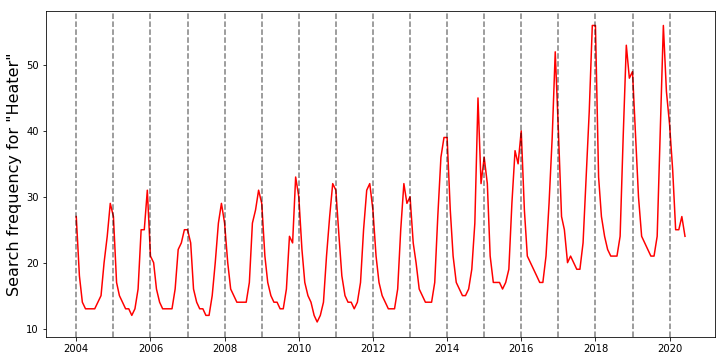

In [8]:
plot_series(heater_series)

In [9]:
avg,dev=heater_series.mean(),heater_series.std()

In [10]:
heater_series=(heater_series-avg)/dev#Z score normaliztion

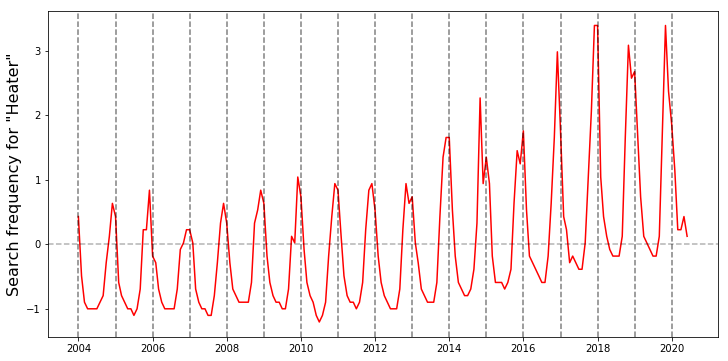

In [11]:
plot_series(heater_series)
plt.axhline(0,linestyle='--',color='k',alpha=0.3)

In [12]:
#Take First Difference to Remove Stationarity
heater_series=heater_series.diff().dropna()

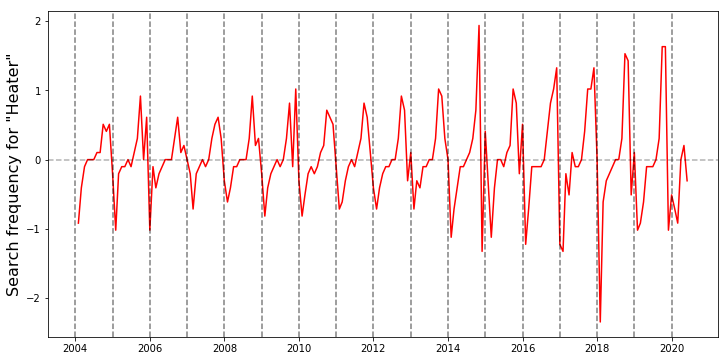

In [13]:
plot_series(heater_series)
plt.axhline(0,linestyle='--',color='k',alpha=0.3)

In [14]:
annual_volatility=heater_series.groupby(heater_series.index.year).std()
annual_volatility

Month
2004    0.415481
2005    0.474527
2006    0.400148
2007    0.359839
2008    0.396182
2009    0.499810
2010    0.459566
2011    0.443924
2012    0.471104
2013    0.503587
2014    0.855743
2015    0.569441
2016    0.719843
2017    0.830886
2018    0.987221
2019    0.892991
2020    0.426657
Name: heater, dtype: float64

In [15]:
heater_annual_vol=heater_series.index.map(lambda d: annual_volatility.loc[d.year])
heater_annual_vol

Float64Index([0.41548104705328837, 0.41548104705328837, 0.41548104705328837,
              0.41548104705328837, 0.41548104705328837, 0.41548104705328837,
              0.41548104705328837, 0.41548104705328837, 0.41548104705328837,
              0.41548104705328837,
              ...
               0.8929910269067829,  0.8929910269067829,  0.8929910269067829,
               0.8929910269067829, 0.42665652301411994, 0.42665652301411994,
              0.42665652301411994, 0.42665652301411994, 0.42665652301411994,
              0.42665652301411994],
             dtype='float64', name='Month', length=197)

In [16]:
heater_series=heater_series/heater_annual_vol
heater_series#constant yearly volatility

Month
2004-02-01   -2.211387
2004-03-01   -0.982838
2004-04-01   -0.245710
2004-05-01    0.000000
2004-06-01    0.000000
                ...   
2020-02-01   -1.674916
2020-03-01   -2.153463
2020-04-01    0.000000
2020-05-01    0.478547
2020-06-01   -0.717821
Freq: MS, Length: 197, dtype: float64

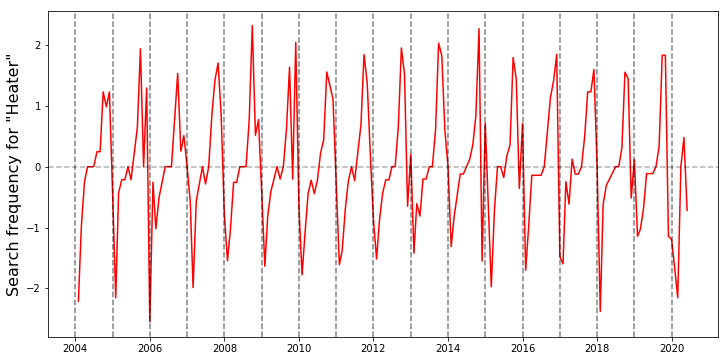

In [17]:
plot_series(heater_series)
plt.axhline(0,linestyle='--',color='k',alpha=0.3)

In [18]:
#Remove Seasonality
month_avg=heater_series.groupby(heater_series.index.month).mean()

In [19]:
month_avg

Month
1    -0.428360
2    -1.483129
3    -1.063595
4    -0.442926
5    -0.121663
6    -0.128425
7    -0.107093
8     0.075720
9     0.544638
10    1.613170
11    1.183118
12    0.491641
dtype: float64

In [20]:
heater_month_avg=heater_series.index.map(lambda d: month_avg.loc[d.month])
heater_month_avg

Float64Index([ -1.4831292771766649,  -1.0635953355687688,  -0.4429263710136824,
              -0.12166261572164781, -0.12842542811874377, -0.10709260508002622,
               0.07572031336904021,   0.5446384049209761,   1.6131699911888608,
                1.1831180641276995,
              ...
                0.5446384049209761,   1.6131699911888608,   1.1831180641276995,
                0.4916411242912192,  -0.4283597874466263,  -1.4831292771766649,
               -1.0635953355687688,  -0.4429263710136824, -0.12166261572164781,
              -0.12842542811874377],
             dtype='float64', name='Month', length=197)

In [21]:
heater_series=heater_series - heater_month_avg

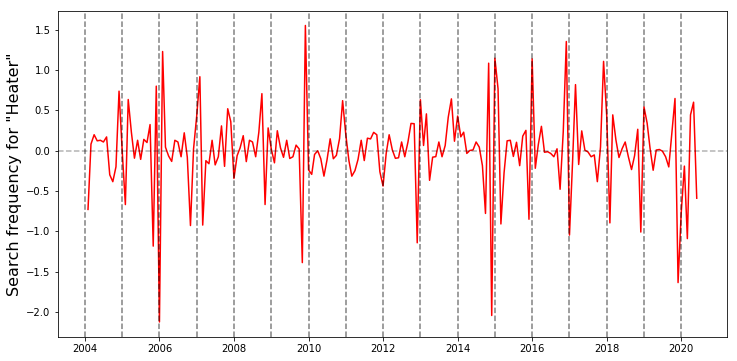

In [22]:
plot_series(heater_series)
plt.axhline(0,linestyle='--',color='k',alpha=0.3)

In [23]:
def adfuller_test(sales):
    result= adfuller(sales)
    labels = ["ADF Test Statistics","p-value","#Lags Used","Number of Observations Used"]
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
        if result[1] <= 0.05:
            print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
        else:
            print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [24]:
adfuller_test(heater_series)

ADF Test Statistics : -14.280161378347369
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
p-value : 1.3281990332221657e-26
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
#Lags Used : 1
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
Number of Observations Used : 195
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [25]:
adfuller(heater_series)[1]

1.3281990332221657e-26

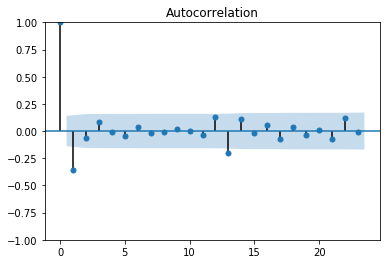

In [26]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
pacf_plot = plot_acf(heater_series)

C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


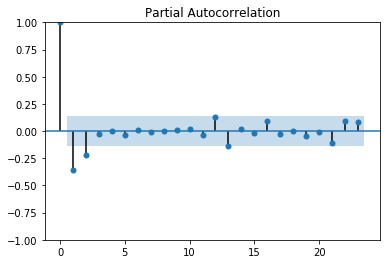

In [27]:
plot_pacf=plot_pacf(heater_series)

In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import timedelta
from statsmodels.tsa.arima.model import ARIMA

In [88]:
train_end = datetime(2019,10,1)
test_end = datetime(2020,6,1)

train_data = heater_series[:train_end]
print(train_data)
test_data = heater_series[train_end+timedelta(days=1) :test_end]
print(test_data)

Month
2004-02-01   -0.728257
2004-03-01    0.080757
2004-04-01    0.197217
2004-05-01    0.121663
2004-06-01    0.128425
                ...   
2019-06-01    0.014104
2019-07-01   -0.007228
2019-08-01   -0.075720
2019-09-01   -0.201675
2019-10-01    0.215967
Freq: MS, Length: 189, dtype: float64
Month
2019-11-01    0.646019
2019-12-01   -1.634852
2020-01-01   -0.768009
2020-02-01   -0.191787
2020-03-01   -1.089868
2020-04-01    0.442926
2020-05-01    0.600210
2020-06-01   -0.589396
Freq: MS, dtype: float64


In [89]:
model = SARIMAX(train_data, order=(2,0,0),seasonal_order=(0,0,1,12))

In [90]:
#start = time()
model_fit = model.fit()
#end = time()
#print('Model Fitting Time:', end - start)

In [91]:
print(model_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  189
Model:             SARIMAX(2, 0, 0)x(0, 0, [1], 12)   Log Likelihood                -105.524
Date:                              Fri, 02 Dec 2022   AIC                            219.048
Time:                                      21:53:29   BIC                            232.015
Sample:                                  02-01-2004   HQIC                           224.301
                                       - 10-01-2019                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5035      0.062     -8.101      0.000      -0.625      -0.382
ar.L2         -0.26

In [92]:
predictions = model_fit.forecast(len(test_data))
print(predictions)

2019-11-01   -0.036138
2019-12-01   -0.139648
2020-01-01    0.079739
2020-02-01    0.036046
2020-03-01   -0.004055
2020-04-01   -0.022452
2020-05-01    0.000876
2020-06-01    0.000638
Freq: MS, Name: predicted_mean, dtype: float64


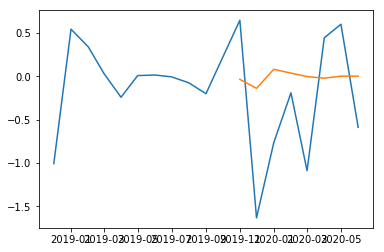

In [93]:
plt.plot(heater_series[-19:])
plt.plot(predictions)